In [1]:
from getdata import GetData

In [2]:
# API 인증키
key = ""
# GetData 인스턴스 생성
data = GetData(key, 'GSBD_DG_geo.csv')

In [ ]:
korea = data.get_lon_lat("sido")
danger = data.get_lon_lat("dng")
restricted = data.get_lon_lat("res")
prohibited = data.get_lon_lat("prh")

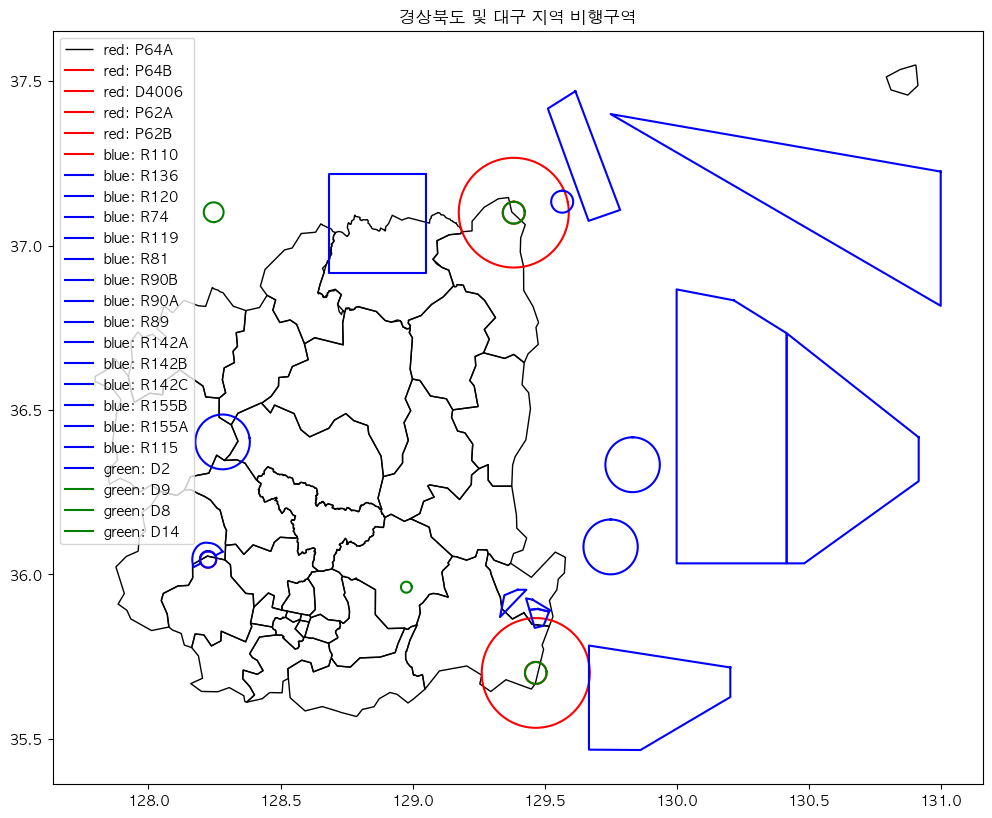

In [4]:
# save = True: 사진 저장
data.plt_visualize(prohibited, restricted, danger,  save=False)

In [ ]:
restricted_rev = data.get_lat_lon("res")
danger_rev = data.get_lat_lon("dng")
prh_rev = data.get_lat_lon("prh")

In [6]:
# 선 클릭하면 해당 제한구역의 이름 확인 가능
data.folium_visualize(prh_rev, restricted_rev, danger_rev)